In [40]:
import xarray as xr
from matplotlib import pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from xmovie import Movie


%matplotlib inline

/home/scollis/.conda/envs/pyart-simple/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
test_ds = xr.load_dataset('/eagle/projects/ESGF2/esg_dataroot/cmip5_css02_data/geomip/GISS/ccb_Amon_GISS-E2-R_abrupt4xCO2_r1i1p1_185001-191912.nc')

/home/scollis/.conda/envs/pyart-simple/lib/python3.6/site-packages/xarray/conventions.py:520: SerializationWarning: variable 'ccb' has multiple fill values {'1.e+20f', b'1.e+20f'}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,
/home/scollis/.conda/envs/pyart-simple/lib/python3.6/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [4]:
test_ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 90, lon: 144, time: 840)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 1919-12-16 12:00:00
  * lat        (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon        (lon) float64 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 1920-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -88.0 -88.0 -86.0 ... 88.0 88.0 90.0
    lon_bnds   (lon, bnds) float64 0.0 2.5 2.5 5.0 ... 355.0 357.5 357.5 360.0
    ccb        (time, lat, lon) float32 1e+20 1e+20 1e+20 ... 1e+20 1e+20 1e+20
Attributes: (12/22)
    institution:            NASA/GISS (Goddard Institute for Space Studies, N...
    experiment_id:          abrupt4xCO2
    source:                 GISS-E2-R-AR5_NINT Atmosphere: GISS-E2; Ocean: R
    model_id:               GISS-E2-R
    forcing:                GHG, LU, Sl, BC, OC, SD, Oz
    parent_experiment_id:   piControl
    ...                     ...
    project_id:             GeoMIP
    table_id:               Table Amon (27 April 2011) cf6101eb7a53baa0a47887...
    title:                  GISS-E2-R model output prepared for GeoMIP abrupt...
    parent_experiment:      pre-industrial control
    modeling_realm:         atmos
    realization:            1.0

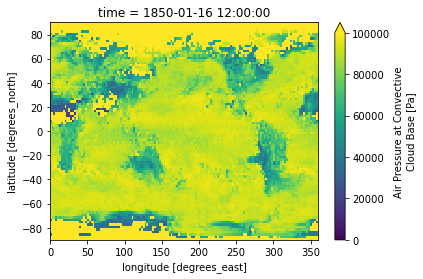

In [10]:
test_ds.ccb.isel(time=0).plot(vmin=0, vmax =1e5)

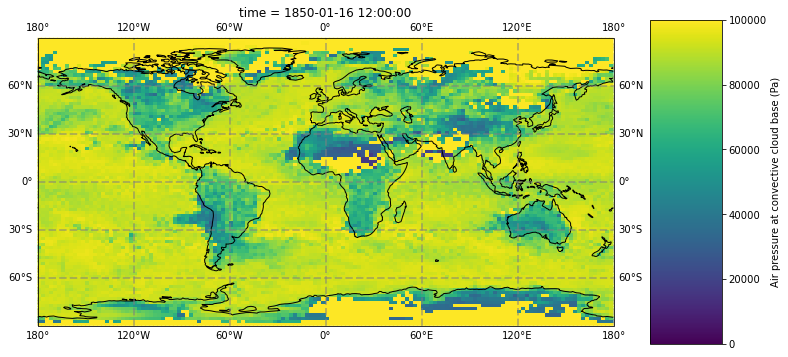

In [39]:
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=[10,15])
map_panel_axes = [0.05, 0.05, .8, .80]
ax1 = fig.add_axes(map_panel_axes, projection=projection)
mp = test_ds.ccb.isel(time=0).plot(vmin=0, vmax =1e5, ax=ax1,add_colorbar=False) 
ax1.add_feature(cfeature.COASTLINE)
ax2 = fig.add_axes([.9,.3, .1,.3])
plt.colorbar(mp, cax=ax2, label='Air pressure at convective cloud base (Pa)')
gl = ax1.gridlines(draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')


In [49]:
def custom_plotfunc(ds, fig, tt, *args, **kwargs):
    projection = ccrs.PlateCarree()
    map_panel_axes = [0.05, 0.05, .8, .80]
    ax1 = fig.add_axes(map_panel_axes, projection=projection)
    mp = ds.ccb.isel(time=tt).plot(vmin=0, vmax =1e5, ax=ax1,add_colorbar=True) 
    ax1.add_feature(cfeature.COASTLINE)
    #ax2 = fig.add_axes([.9,.1, .1,.8])
    #plt.colorbar(mp, cax=ax2, label='Air pressure at convective cloud base (Pa)')
    gl = ax1.gridlines(draw_labels=True,
                      linewidth=2, color='gray', alpha=0.5, linestyle='--')
    
    return None, None


In [50]:
ds_ss = test_ds.isel(time=range(10))

In [51]:
mov_parallel = Movie(ds_ss.chunk({'time':1}), custom_plotfunc, input_check=False, dpi=150)#, dpi=300, pixelwidth=4800, pixelheight=1980,)

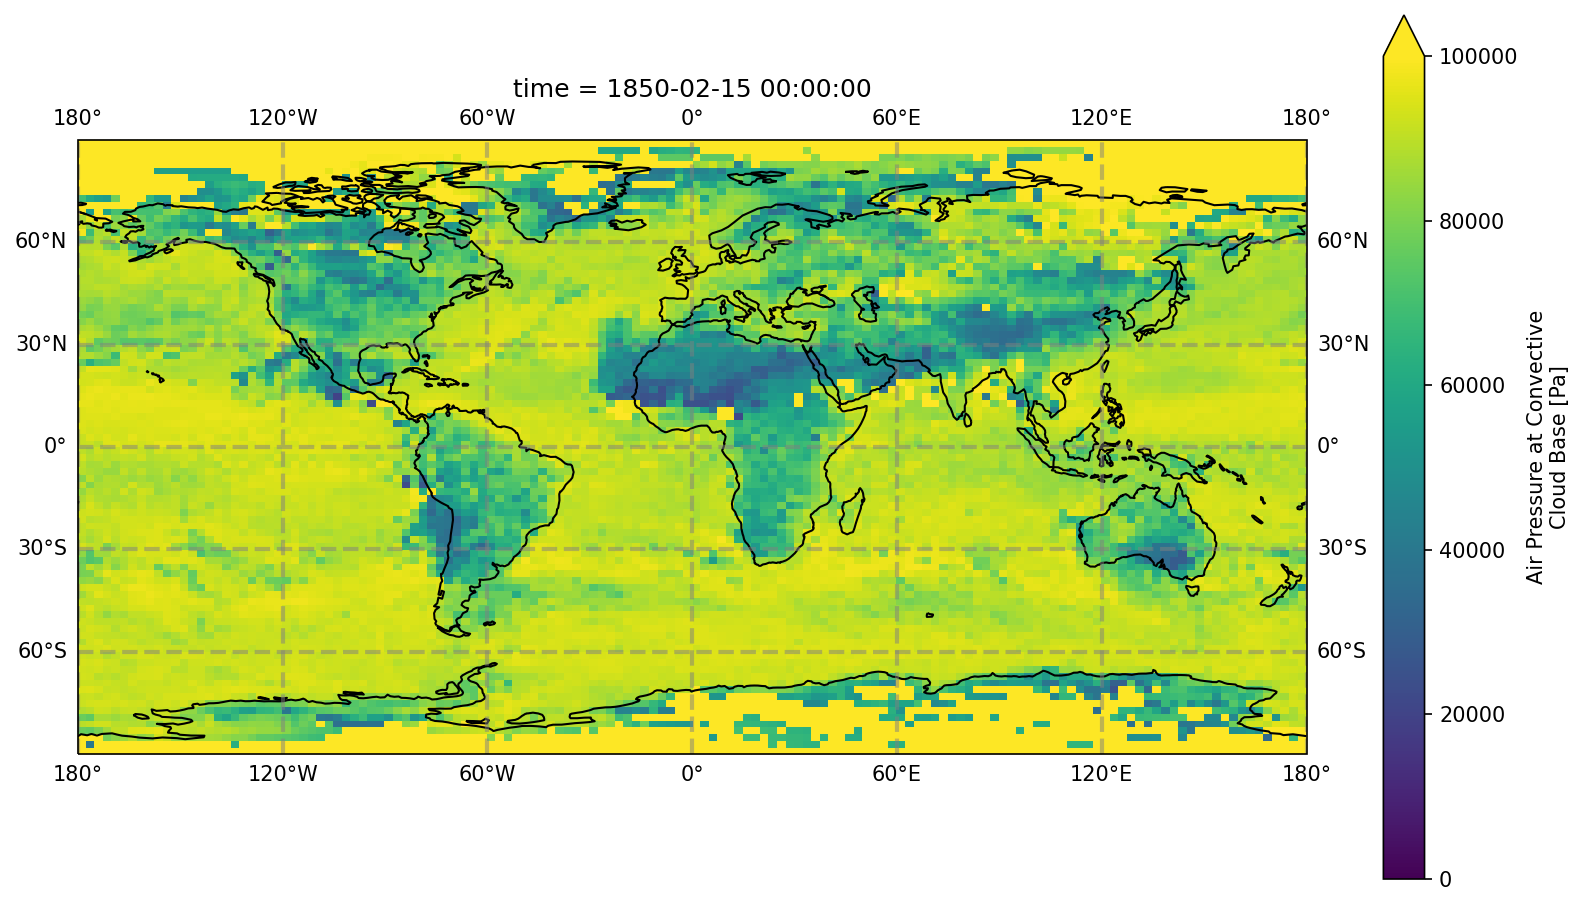

In [52]:
mov_parallel.preview(1)

In [53]:
mov_parallel.save(
    'movie_parallel.mov',
    parallel=True,
    overwrite_existing=True,
    gif_resolution_factor=2.0,
    parallel_compute_kwargs=dict(scheduler="processes", num_workers=8)
)


Movie created at movie_parallel.mov
